# 1. Converting raw images to black & white (binary) & resizing to 400 x 400. Elbow method to determine appropriate number of K's for clustering

/var/folders/fg/p76km85561bbpbtn0_zrrvch0000gn/T/ipykernel_16265/367375045.py:16: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(target_size, Image.ANTIALIAS)#Use Antialias to maintain clear images
/Users/maxbenson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxbenson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxbenson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

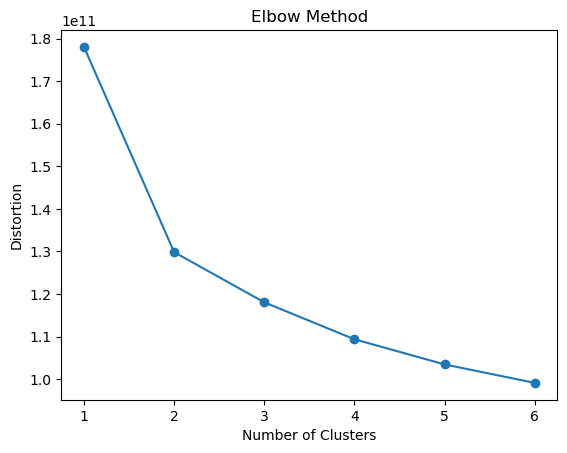

In [1]:
import os    #For reading and writing files within my OS, important as most output saved in folders on my desktop
import cv2   #For utilising OpenCV
from PIL import Image  #Same as OS, but for images
import numpy as np  #Used for arrays 
from sklearn.cluster import KMeans #Allows for K-Means computation
import matplotlib.pyplot as plt #For plotting the Elbow method 

def load_and_preprocess_images(folder_path, target_size=(400, 400)):
    #function for loading and processing images from specific folder. Image size chosen is 400 x 400
    images = []
    file_names = []
    for filename in os.listdir(folder_path):  #Loop through each file within the folder
        if filename.lower().endswith(('.jpg', '.jpeg')): #Make sure the files are .jpg or .jpeg
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path).convert("L") #Open files and convert to grayscale 
            img = img.resize(target_size, Image.ANTIALIAS)#Use Antialias to maintain clear images
            img_array = np.array(img) #Convert to array
            _, img_binary = cv2.threshold(img_array, 128, 255, cv2.THRESH_BINARY)
            #binary thresholding. white = pixel over 128 so set to 255, black = under 128
            images.append(img_binary.flatten())
            file_names.append(filename)
    return np.array(images), file_names #convert to numpy array and return with file names

def plot_elbow_method(image_data, max_clusters=10): #Plot elbow method for suitable number of clusters
    distortions = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42) #loop through each number of clusters to the max, 10
        kmeans.fit(image_data)
        distortions.append(kmeans.inertia_)  #calculate and change intertia to list of distortions

    plt.plot(range(1, max_clusters + 1), distortions, marker='o')  #plotting of graph
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.show()

def main():
    input_folder = "/Users/maxbenson/Desktop/Raw Images"  #pathname to raw image file
    max_clusters = 6  # Maximum number of clusters to try

    image_data, _ = load_and_preprocess_images(input_folder)
    plot_elbow_method(image_data, max_clusters) #load and preprocess images and plot the graph

if __name__ == "__main__":
    main()


# K-Means Clustering using K=3

In [3]:
#initalise K means, fit images to data and obtain all labels 
def kmeans_clustering(image_data, num_clusters): 
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(image_data)
    return kmeans.labels_

#Save image to folder, assign labels to each image (supervised learning). Each image saved in seperate folder
#represening the clusters
def save_clustered_images(output_folder, image_data, labels, file_names):
    os.makedirs(output_folder, exist_ok=True)

    for cluster_num in range(max(labels) + 1):
        cluster_folder = os.path.join(output_folder, f"Cluster_{cluster_num}")
        os.makedirs(cluster_folder, exist_ok=True)

        cluster_images = image_data[labels == cluster_num]
        cluster_file_names = np.array(file_names)[labels == cluster_num]
        for img_data, filename in zip(cluster_images, cluster_file_names):
            img = np.reshape(img_data, (400, 400)) #images are flattened in array 400 x 400
            img = Image.fromarray(img) 
            img_path = os.path.join(cluster_folder, filename)
            img.save(img_path)

#Specify folder paths and optimal number of clusters, made apparent from the elbow method above
def main():
    input_folder = "/Users/maxbenson/Desktop/Raw Images"
    output_folder = "/Users/maxbenson/Desktop/Pre-Processed Images"
    num_clusters = 3  #optimal number of clusters

#load images, perform K-means, save to output folder
    image_data, file_names = load_and_preprocess_images(input_folder)
    labels = kmeans_clustering(image_data, num_clusters)
    save_clustered_images(output_folder, image_data, labels, file_names)

if __name__ == "__main__":
    main()


/var/folders/fg/p76km85561bbpbtn0_zrrvch0000gn/T/ipykernel_16265/367375045.py:16: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(target_size, Image.ANTIALIAS)#Use Antialias to maintain clear images
/Users/maxbenson/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Plotting Persistence Graphs

In [4]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from ripser import ripser #Ripser is a package to compute persistent homnology 

#Go through any folders within the main folder, check image type, construct path, change to numpy array
def load_preprocessed_images(folder_path):
    images = []
    file_names = []
    for root, dirs, files in os.walk(folder_path):
        for filename in files:
            if filename.lower().endswith(('.jpg', '.jpeg')):
                img_path = os.path.join(root, filename)
                img = Image.open(img_path)
                img_array = np.array(img)
                images.append(img_array)
                file_names.append(filename)
#Return images with file names 
    return images, file_names

#Compute persistence for each image using ripser, change to list of diagrams
def compute_persistence_diagrams(images):
    diagrams = []
    for img in images:
        result = ripser(img)
        diagrams.append(result['dgms'])
    return diagrams

#Save and plot the persistence diagrams. 
def save_persistence_diagrams(output_folder, diagrams, file_names):
    os.makedirs(output_folder, exist_ok=True)
    for diagram, filename in zip(diagrams, file_names):
        fig = plt.figure(figsize=(6, 6))
        plt.subplot(1, 1, 1)
        for dim, dgm in enumerate(diagram):
            if len(dgm) > 0:
                birth = [pt[0] for pt in dgm]
                death = [pt[1] for pt in dgm]
                plt.scatter(birth, death, label=f'Dimension {dim}')
        plt.title(f"Persistence Diagram for {filename}")
        plt.xlabel("Birth")
        plt.ylabel("Death")
        plt.legend()
        plt.savefig(os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_persistence_diagram.png"))
        plt.close(fig)
        
#Code from line 22-46 adapted from - https://github.com/scikit-tda/ripser.py.

#Input and output folder paths, load images, compute persitsence and save the plots in output folder
def main():
    input_folder = "/Users/maxbenson/Desktop/Pre-Processed Images"
    output_folder = "/Users/maxbenson/Desktop/Persistence Diagrams"

    images, file_names = load_preprocessed_images(input_folder)

    diagrams = compute_persistence_diagrams(images)

    save_persistence_diagrams(output_folder, diagrams, file_names)

if __name__ == "__main__":
    main()


/Users/maxbenson/ripser.py/ripser/ripser.py:247: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  warnings.warn(
/Users/maxbenson/ripser.py/ripser/ripser.py:247: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  warnings.warn(
/Users/maxbenson/ripser.py/ripser/ripser.py:247: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  warnings.warn(
/Users/maxbenson/ripser.py/ripser/ripser.py:247: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  warnings.warn(
/Users/maxbenson/ripser.py/ripser/ripser.py:247: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  

# Obtaining coordinates and bottleneck distance 

In [5]:
#Load all images, store in arrays, check filename is correct, append file name to list
import csv
def load_preprocessed_images(folder_path):
    images = []
    file_names = []
    for root, dirs, files in os.walk(folder_path):
        for filename in files:
            if filename.lower().endswith(('.jpg', '.jpeg')):
                img_path = os.path.join(root, filename)
                img = Image.open(img_path)
                img_array = np.array(img)
                images.append(img_array)
                file_names.append(filename)
    return images, file_names

#Compute the persistence diagrams without producing an actual output. 
def compute_persistence_diagrams(images):
    diagrams = []
    coordinates = []  
    for img in images:
        result = ripser(img)
        diagrams.append(result['dgms'])
        coordinates.append(result['cocycles'])
    return diagrams, coordinates

#Compute bottleneck distances between 2 images
def bottleneck_distance(dgm1, dgm2):
    dist = 0
    for i in range(len(dgm1)):
        for j in range(len(dgm2)):
            if len(dgm1[i]) > 0 and len(dgm2[j]) > 0:  # Check if the diagrams are empty
                dist = max(dist, abs(dgm1[i][0][0] - dgm2[j][0][0]), abs(dgm1[i][0][1] - dgm2[j][0][1]))
    return dist

def compute_bottleneck_distances(diagrams):
    num_images = len(diagrams)
    distances = np.zeros((num_images, num_images)) #Create distance matrix with null figures

    for i in range(num_images):
        for j in range(num_images):
            if i == j:
                distances[i, j] = 0
            else:
                distances[i, j] = bottleneck_distance(diagrams[i], diagrams[j])

    return distances

#Save distances within a CSV File 
def save_bottleneck_distances(output_folder, distances, file_names):
    output_file = os.path.join(output_folder, "bottleneck_distances.csv")
    with open(output_file, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow([''] + file_names)  # File names now become column headers
        for i, row in enumerate(distances):
            writer.writerow([file_names[i]] + list(row))

#Save persistence diagrams again for cross checking reliability of original
#Save the coorindates as a .txt file
def save_persistence_diagrams(output_folder, diagrams, coordinates, file_names):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for idx, (diagram, coords, file_name) in enumerate(zip(diagrams, coordinates, file_names)):
        output_file = os.path.join(output_folder, f"{file_name}.txt")
        with open(output_file, "w") as f:
            f.write(f"File: {file_name}\n")
            for dim, points in enumerate(diagram):
                f.write(f"Dimension {dim}:\n")
                for idx, (birth, death) in enumerate(points):
                    f.write(f"Point {idx}: Birth={birth}, Death={death}\n")

            # Print coordinates for debugging, originally the size of the data was causing kernal death
            f.write(f"Coordinates:\n")
            for dim, coord in enumerate(coords):
                f.write(f"Dimension {dim}:\n")
                for point in coord:
                    f.write(f"{point}\n")

    print("Persistence diagrams and coordinates saved successfully!") #Print if function completes

#Main function, also sends coordinates and persistence to seperate folders
def main():
    input_folder = "/Users/maxbenson/Desktop/Pre-Processed Images"
    output_folder = "/Users/maxbenson/Desktop/Persistence coordinates"

    images, file_names = load_preprocessed_images(input_folder)
    diagrams, coordinates = compute_persistence_diagrams(images)
    distances = compute_bottleneck_distances(diagrams)
    save_bottleneck_distances(output_folder, distances, file_names)
    save_persistence_diagrams(output_folder, diagrams, coordinates, file_names)

if __name__ == "__main__":
    main()


/Users/maxbenson/ripser.py/ripser/ripser.py:247: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  warnings.warn(
/Users/maxbenson/ripser.py/ripser/ripser.py:247: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  warnings.warn(
/Users/maxbenson/ripser.py/ripser/ripser.py:247: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  warnings.warn(
/Users/maxbenson/ripser.py/ripser/ripser.py:247: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  warnings.warn(
/Users/maxbenson/ripser.py/ripser/ripser.py:247: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  

Persistence diagrams and coordinates saved successfully!


# Analaysis using hierarchical clustering to create dendrogram

/var/folders/fg/p76km85561bbpbtn0_zrrvch0000gn/T/ipykernel_16265/862330694.py:14: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(bottleneck_distances, method='complete', metric='euclidean')


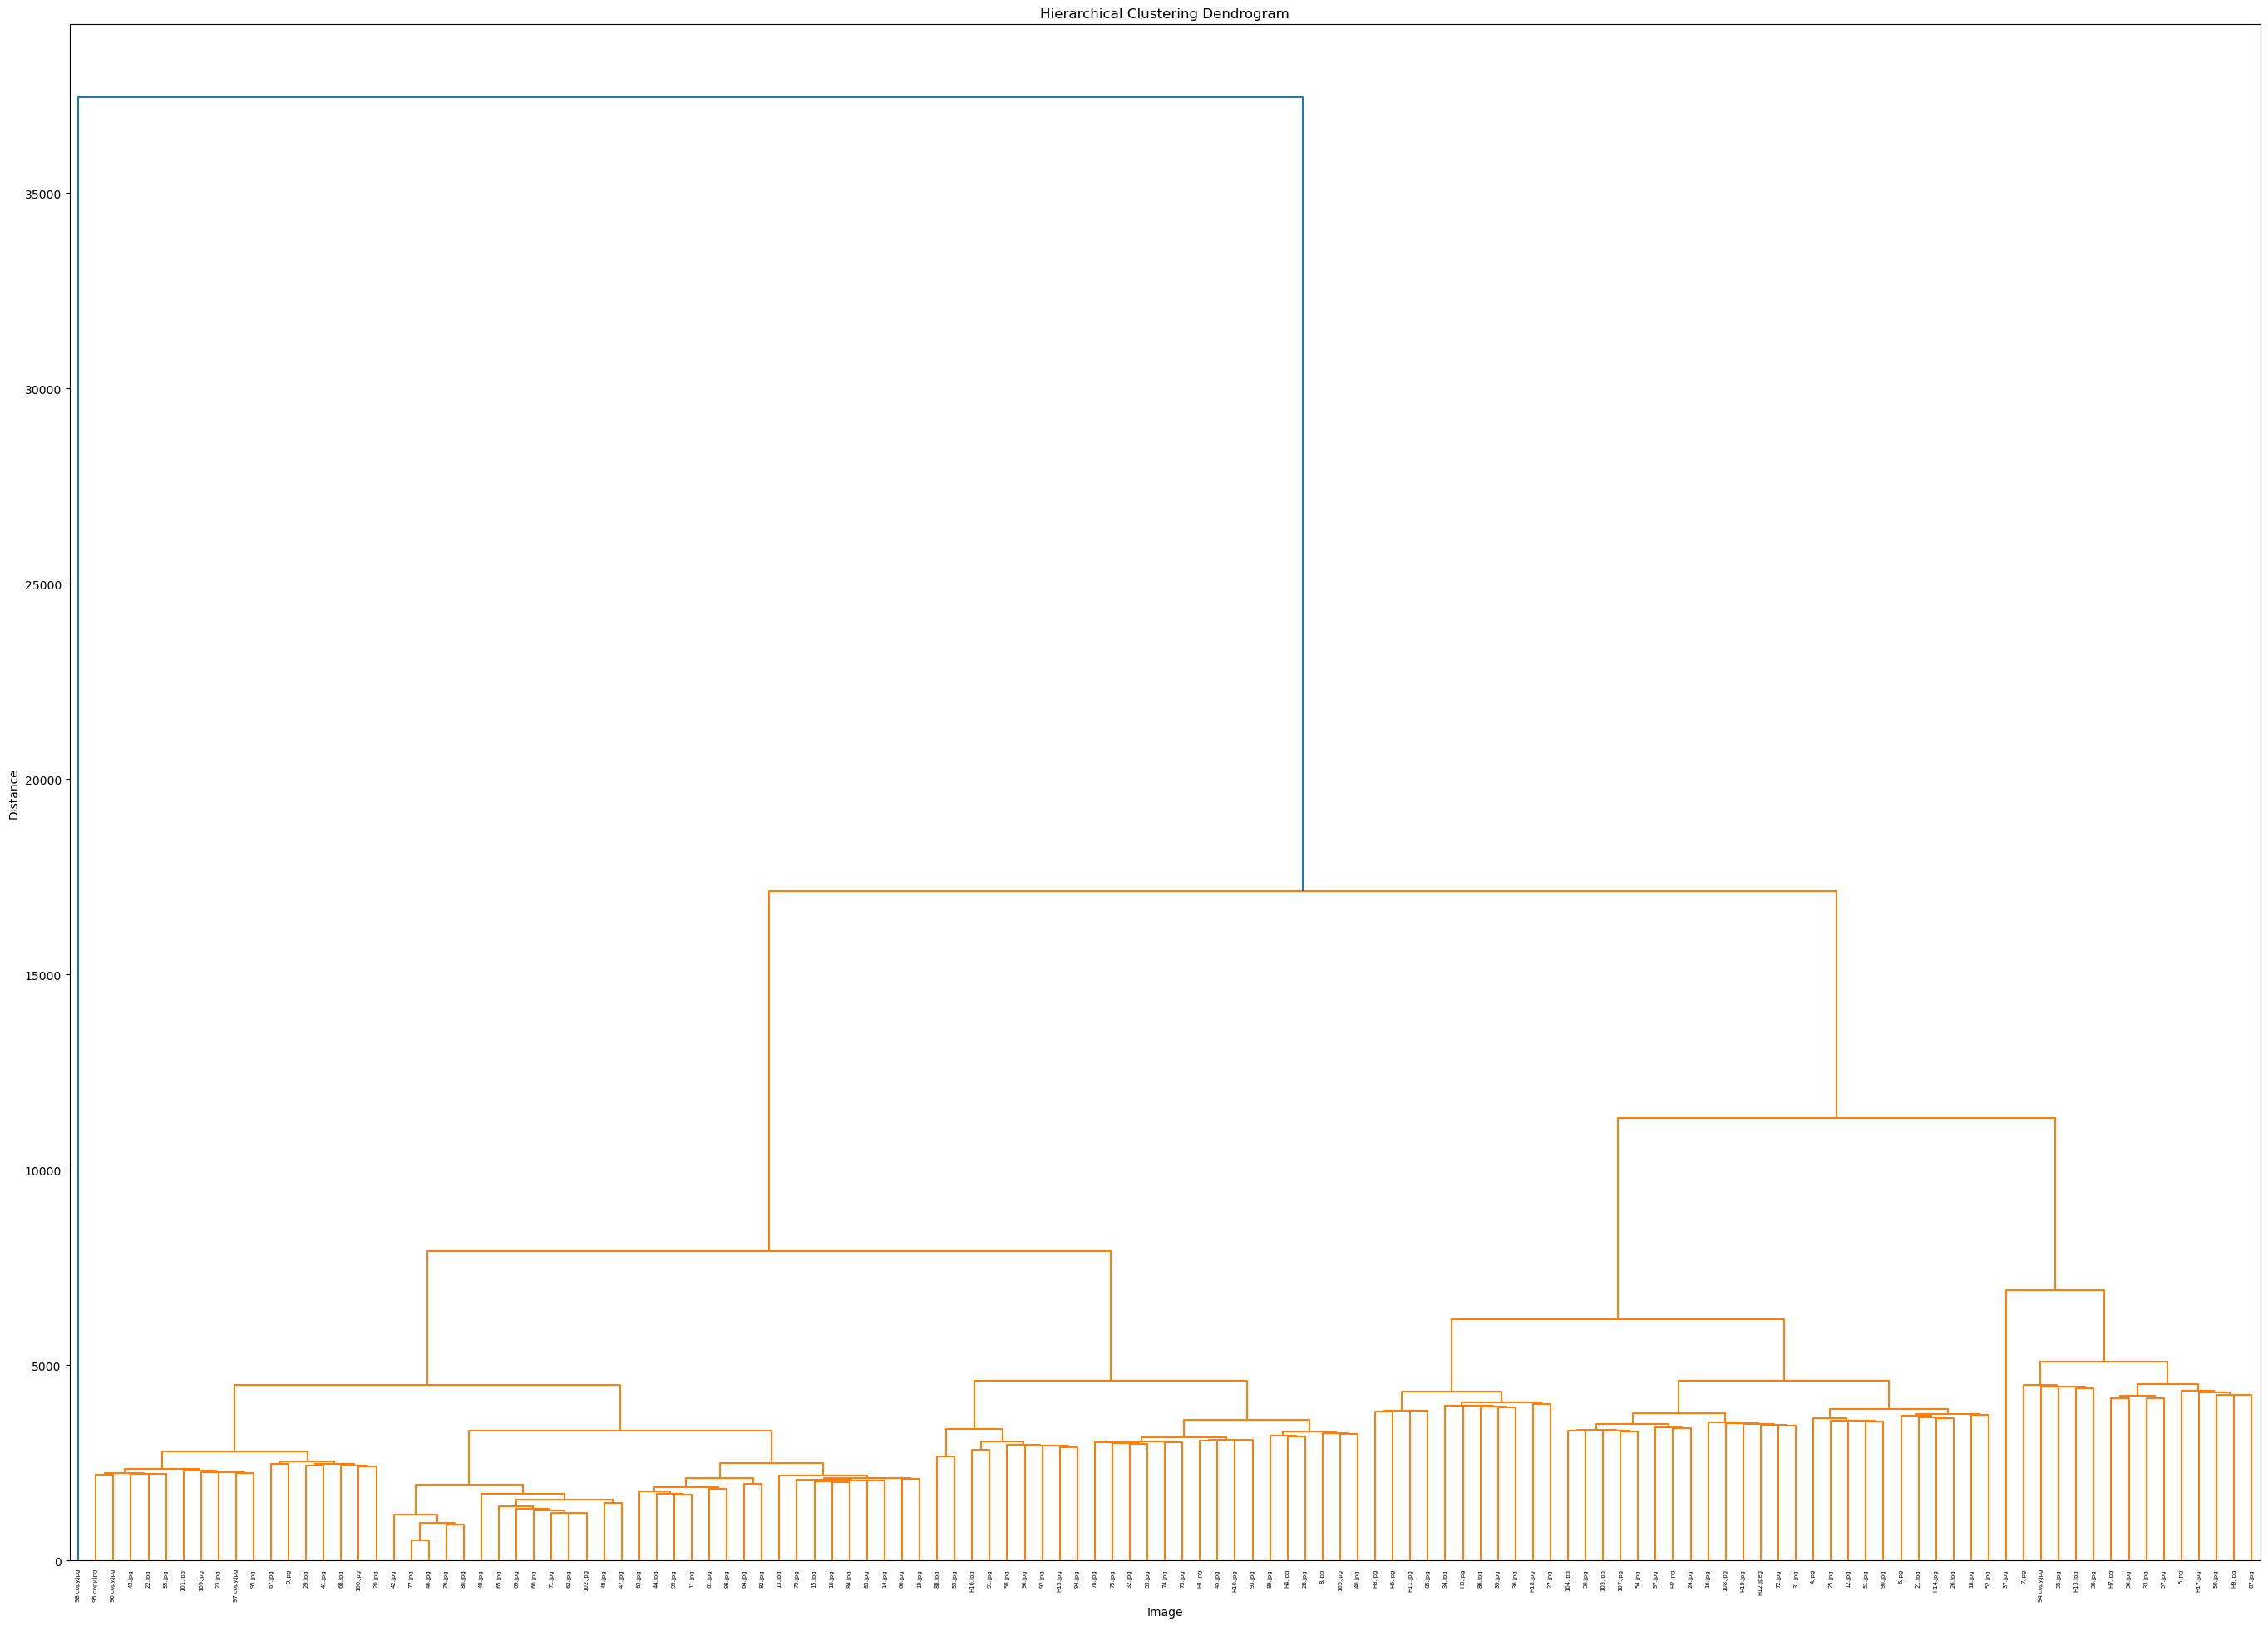

In [7]:
import pandas as pd #Used for data cleaning
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram #Allows construction of dendrogram
import numpy as np
import os

#Load the bottleneck distances from the CSV 
bottleneck_distances = pd.read_csv("/Users/maxbenson/Desktop/Persistence coordinates/bottleneck_distances.csv", index_col=0)

# Replaces the infinite numbers with 0
bottleneck_distances.replace([np.inf, -np.inf], 0, inplace=True)

# function for hierarchical clustering
Z = linkage(bottleneck_distances, method='complete', metric='euclidean')

# Plot the dendrogram, large fig size due to amount of data
plt.figure(figsize=(34, 24)) 
dendrogram(Z, labels=bottleneck_distances.index, leaf_rotation=90)  # Rotate labels
plt.xlabel('Image')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')

#Creates folder and saves dendrogram in there
output_folder = "/Users/maxbenson/Desktop/Analysis"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

output_path = os.path.join(output_folder, "dendrogram.png")
plt.savefig(output_path)

plt.show()


# Scalling data to perform Multi-dimensional clustering

In [10]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler #MinMax scalling used to handle infinte/large numbers
import numpy as np

#Load bottleneck distances from csv into a dataframe 
def load_bottleneck_distances(bottleneck_distances_csv):
    distances_df = pd.read_csv(bottleneck_distances_csv, index_col=0)
    return distances_df

#Replace infinite values with maximum to stop Float.64 error
def preprocess_distances(distances_df):
    max_value = np.finfo(np.float64).max  # Maximum representable value for float64
    distances_df = distances_df.replace([np.inf, -np.inf], max_value)
    return distances_df

#Perform min-max scaling of all the distances
def min_max_scaling(distances_df):
    scaler = MinMaxScaler()
    scaled_distances = scaler.fit_transform(distances_df)
    scaled_distances_df = pd.DataFrame(scaled_distances, columns=distances_df.columns, index=distances_df.index)
    return scaled_distances_df

#Save in new CSV, Not to replace the original
def save_scaled_distances(output_folder, scaled_distances_df):
    os.makedirs(output_folder, exist_ok=True)
    output_path = os.path.join(output_folder, "scaled_bottleneck_distances.csv")
    scaled_distances_df.to_csv(output_path)

#Input and output folders to save new dataframe
def main():
    input_folder = "/Users/maxbenson/Desktop/Bottleneck Distances"
    output_folder = "/Users/maxbenson/Desktop/Analysis"

    #Load the bottleneck distances
    bottleneck_distances_csv = os.path.join(input_folder, "/Users/maxbenson/Desktop/Persistence coordinates/bottleneck_distances.csv")
    distances_df = load_bottleneck_distances(bottleneck_distances_csv)

    #Pre-process
    distances_df = preprocess_distances(distances_df)

    #Scaling
    scaled_distances_df = min_max_scaling(distances_df)

    #Save function
    save_scaled_distances(output_folder, scaled_distances_df)

if __name__ == "__main__":
    main()


# Multi-dimensional clustering

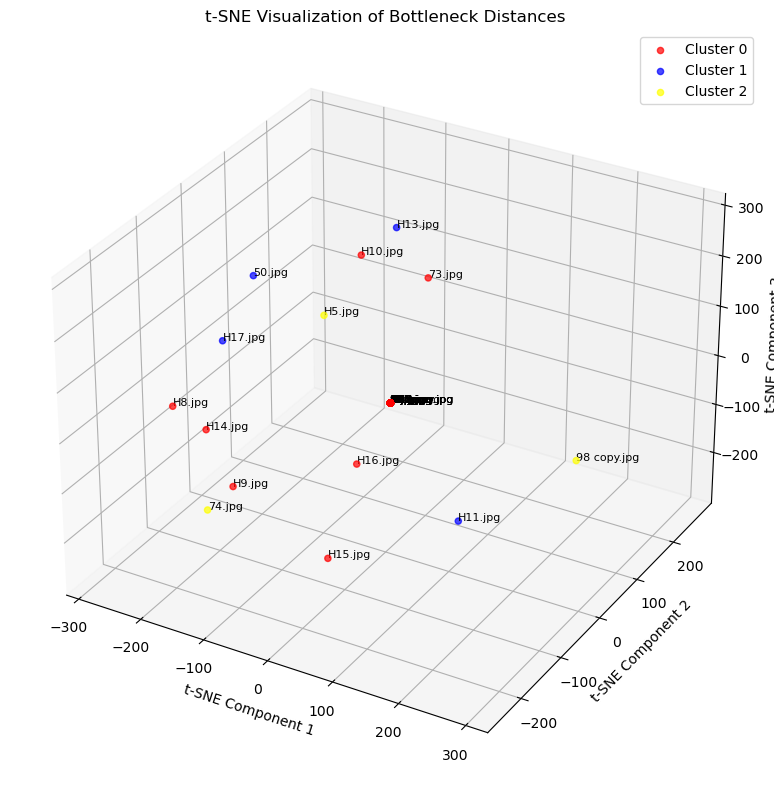

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE #helps with spreading data for easier visualisation
import numpy as np
import os

#Load the newly scaled dataframe
def load_scaled_bottleneck_distances(scaled_distances_csv):
    distances_df = pd.read_csv(scaled_distances_csv, index_col=0)
    return distances_df

#Function for 3D visualisation 
def visualize_tsne_3d(embeddings, labels, file_names, output_folder):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

#Custom colour mapping and labelling. Compute tnse embeddings for better clarity 
    colormap = {0: 'red', 1: 'blue', 2: 'yellow'} 

    for label in np.unique(labels):
        idx = labels == label
        ax.scatter(embeddings[idx, 0], embeddings[idx, 1], embeddings[idx, 2], c=colormap[label], label=f'Cluster {label}', alpha=0.7)

    for i, file_name in enumerate(file_names):
        ax.text(embeddings[i, 0], embeddings[i, 1], embeddings[i, 2], file_name, fontsize=8)

    ax.set_xlabel('t-SNE Component 1')
    ax.set_ylabel('t-SNE Component 2')
    ax.set_zlabel('t-SNE Component 3')
    ax.set_title('t-SNE Visualization of Bottleneck Distances')
    ax.legend()
    plt.tight_layout()

#Line 17 - 32 adapted from https://www.geeksforgeeks.org/multidimensional-data-analysis-in-python/

#Save graph as .png in specified output file
    output_file = os.path.join(output_folder, 'tsne_visualization_3d.png')
    plt.savefig(output_file)
    plt.show()

#Input and output folders
def main():
    scaled_distances_csv = "/Users/maxbenson/Desktop/Analysis/scaled_bottleneck_distances.csv"
    output_folder = "/Users/maxbenson/Desktop/Analysis"

    #Load the distances
    distances_df = load_scaled_bottleneck_distances(scaled_distances_csv)

    #Compute TNSE
    tsne = TSNE(n_components=3, perplexity=50, learning_rate=100, random_state=42)
    embeddings = tsne.fit_transform(distances_df)

    #Cluster labels for each data point
    labels = np.random.randint(0, 3, size=len(distances_df))

    #Visual plotting
    visualize_tsne_3d(embeddings, labels, distances_df.columns, output_folder)

if __name__ == "__main__":
    main()
